In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_pickle('summary_df.pkl')
df2 = pd.read_pickle('summary_df_test.pkl')
df3 = pd.read_pickle('summary_df_test_2.pkl')

In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
df.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,cell,cycle_life,C1,C2,Q1,Qd
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,b1c0,1190,3.6,3.6,80,0.000000
1,0.016739,1.071289,1.070689,31.875000,29.562500,35.65625,13.343750,2.0,b1c0,1190,3.6,3.6,80,1.070312
2,0.016724,1.071289,1.071900,31.937500,29.609375,35.68750,13.421875,3.0,b1c0,1190,3.6,3.6,80,1.072266
3,0.016678,1.072266,1.072510,31.937500,29.750000,35.68750,13.421875,4.0,b1c0,1190,3.6,3.6,80,1.072266
4,0.016663,1.073242,1.073174,31.953125,29.640625,35.71875,13.343750,5.0,b1c0,1190,3.6,3.6,80,1.073242


In [5]:
df['cycle_life'].value_counts()

1935    1934
1836    1835
1801    1800
876     1750
870     1738
        ... 
438      464
335      361
300      326
209      208
148      170
Name: cycle_life, Length: 127, dtype: int64

In [6]:
df['cycle'] = df['cycle'].astype('int16')

In [7]:
df.shape

(110312, 14)

In [8]:
df = df[df['IR'] != 0]

In [9]:
df.shape

(110244, 14)

In [10]:
df = df[df['cycle'] <= 100]

In [11]:
df['cycle_life'].value_counts()

429     200
828     200
858     200
487     200
483     200
       ... 
906      98
1226     98
1227     98
862      98
636      98
Name: cycle_life, Length: 127, dtype: int64

In [12]:
df.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,cell,cycle_life,C1,C2,Q1,Qd
1,0.016739,1.071289,1.070689,31.875000,29.562500,35.65625,13.343750,2,b1c0,1190,3.6,3.6,80,1.070312
2,0.016724,1.071289,1.071900,31.937500,29.609375,35.68750,13.421875,3,b1c0,1190,3.6,3.6,80,1.072266
3,0.016678,1.072266,1.072510,31.937500,29.750000,35.68750,13.421875,4,b1c0,1190,3.6,3.6,80,1.072266
4,0.016663,1.073242,1.073174,31.953125,29.640625,35.71875,13.343750,5,b1c0,1190,3.6,3.6,80,1.073242
5,0.016617,1.073242,1.073576,31.968750,29.750000,35.71875,13.343750,6,b1c0,1190,3.6,3.6,80,1.073242


In [13]:
y = df['cycle_life']

In [14]:
X = df.drop(['cycle_life','cell','cycle'], axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg_lin = LinearRegression(normalize=True)

In [18]:
reg_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [19]:
y_pred = reg_lin.predict(X_test)

In [20]:
np.set_printoptions(precision=2)

(0, 1200)

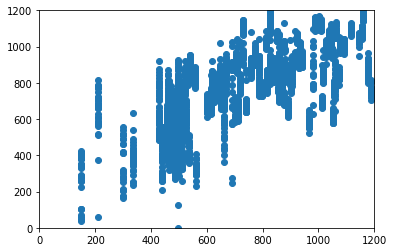

In [21]:
plt.scatter(y_test, y_pred)
plt.xlim(0,1200)
plt.ylim(0,1200)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
r2_score(y_test, y_pred)

0.541628238525761

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

218.70518290309965

# Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(n_estimators=500)
Forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [26]:
y_pred = Forest.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.997295680415782

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

16.79883461479491

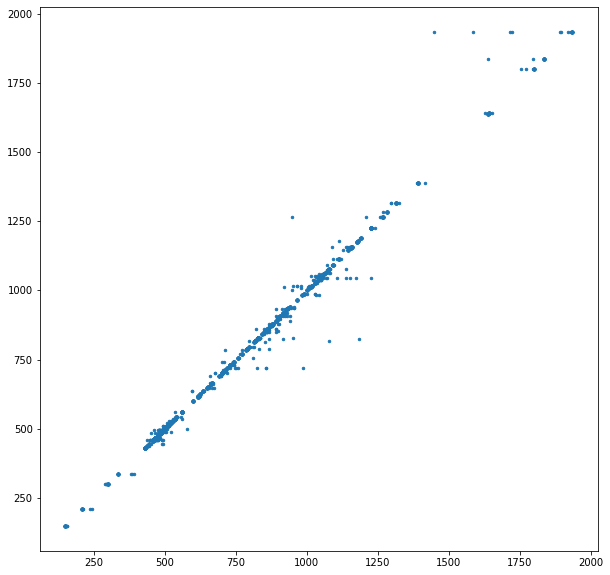

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)
# plt.xlim(0,1200)
# plt.ylim(0,1200)

# XGBoosting

In [30]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 )

regr.fit(X_train, y_train)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(X_test)

# print("XGBoost score on training set: ", rmse(y_test, y_pred))

# # Run prediction on the Kaggle test set.
# y_pred_xgb = regr.predict(test_df_munged)

/home/tam/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
r2_score(y_test, y_pred)

0.9961823513143466

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

19.95943

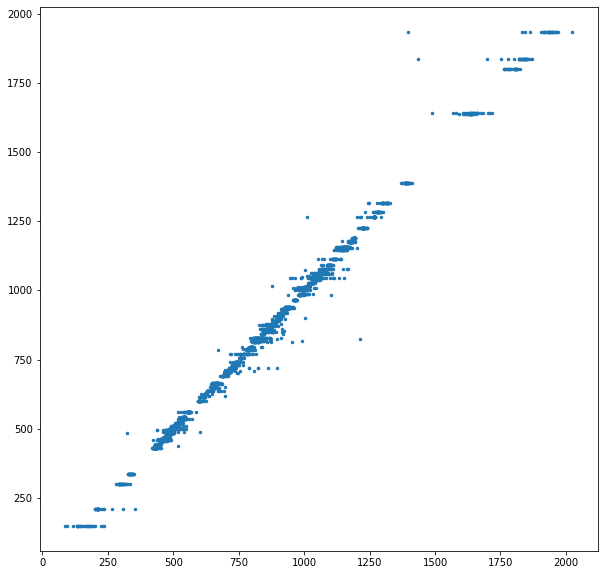

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)


In [34]:
from sklearn.linear_model import Lasso

# I found this best alpha through cross-validation.
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train, y_train)

# Run prediction on training set to get a rough idea of how well it does.
# y_pred = regr.predict(y_test.reshape(-1,1))
# y_test = label_df
# print("Lasso score on training set: ", rmse(y_test, y_pred))

# # Run prediction on the Kaggle test set.
# y_pred_lasso = regr.predict(test_df_munged)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
y_pred = regr.predict(X_test)

In [36]:
r2_score(y_test, y_pred)

0.54146948377032

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

218.7430533446793

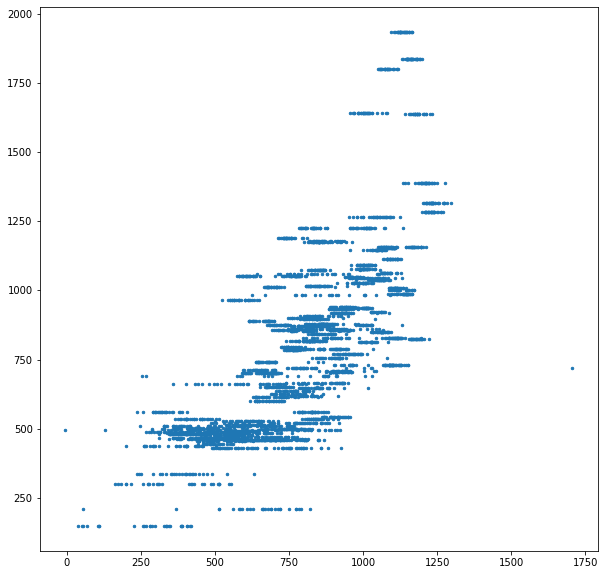

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)


In [39]:
# Import Ridge regression from sklearn
from sklearn.linear_model import Ridge
# Evaluate model performance using root mean square error
from sklearn.metrics import mean_squared_error

# check the below alpha values for Ridge Regression
alpha=[0.01]#, 0.03, 0.1, 0.3, 1, 3, 10, 30]

ridge=Ridge(alpha=alpha, copy_X=True, fit_intercept=True)
ridge.fit(X_train, y_train)
pred=ridge.predict(X_test)


In [40]:
r2_score(y_test, pred)

0.5393809700242969

In [41]:
np.sqrt(mean_squared_error(y_test, pred))

219.24065255188847

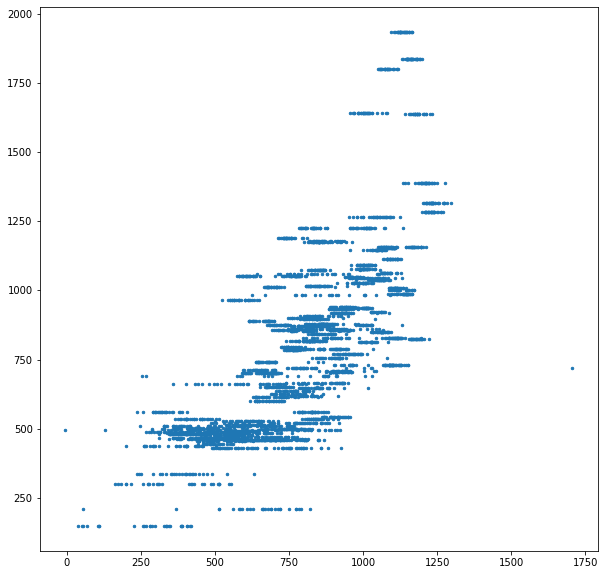

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)